In [1]:
import cv2
import numpy as np
from PIL import Image

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:

a = cv2.imread("c_2.png")
img1 = a.copy()
img1[:,:,0] = cv2.normalize(a[:,:,0], dst=None, alpha=0, beta=255,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
img1[:,:,1] = cv2.normalize(a[:,:,1], dst=None, alpha=0, beta=255,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
img1[:,:,2] = cv2.normalize(a[:,:,2], dst=None, alpha=0, beta=255,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
g_img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
uneq_img=g_img
g_img = cv2.equalizeHist(g_img)
img = g_img.copy()
img2=uneq_img
#g_img = cv2.normalize(g_img, dst=None, alpha=0, beta=255,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

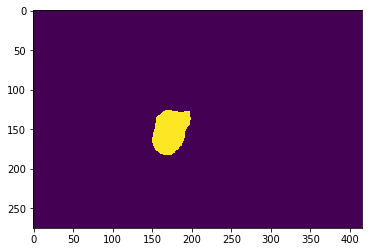

In [4]:
h ,w =img.shape[:2]
for y in range(h):
    for x in range(w):
        if img[y,x] <245:
            img[y,x]=0
#plt.imshow(img)
nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(img, connectivity=4)
sizes = stats[:, -1]

max_label = 1
max_size = np.mean(output[1])
for i in range(2, nb_components):
    if np.mean(output[i]) > max_size:
        max_label = i
        max_size = np.mean(output[i])

img3 = np.zeros(output.shape)
img3[output == max_label] = 255
plt.imshow(img3)

#plt.imshow(img3)

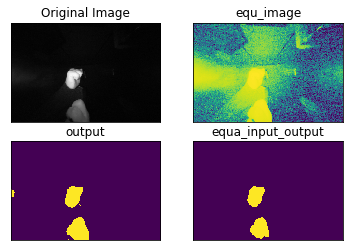

In [5]:

# Otsu's thresholding after Gaussian filtering
ret3,th3 = cv2.threshold(g_img,245,255,cv2.THRESH_BINARY)
blur = cv2.GaussianBlur(th3,(5,5),0)
ret1,th1 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

ret4,th4 = cv2.threshold(uneq_img,35,255,cv2.THRESH_BINARY)
blur2 = cv2.GaussianBlur(th4,(5,5),0)
ret2,th2 = cv2.threshold(blur2,50,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
titles = ['Original Image','equ_image','output','equa_input_output']
images = [a,g_img,th2,th1]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

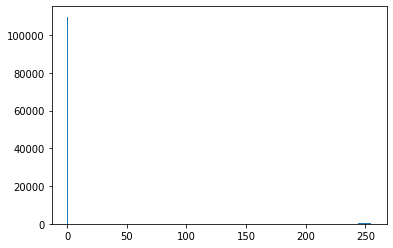

In [6]:
plt.hist(img.ravel(),256,[0,255]); plt.show()

[ 157  212   55   59 2234]


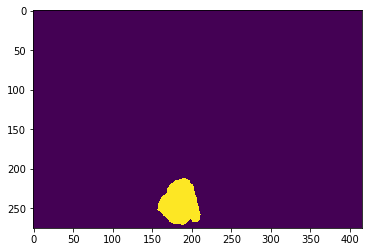

In [7]:
stretch_near = cv2.resize(th1, (255, 255),  
               interpolation = cv2.INTER_NEAREST)

nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(th1, connectivity=4)
sizes = stats[:, -1]

max_label = 1
max_size = sizes[1]
for i in range(2, nb_components):
    if sizes[i] > max_size:
        max_label = i
        max_size = sizes[i]

img3 = np.zeros(output.shape)
img3[output == max_label] = 255
plt.imshow(img3)
#cv2.imwrite("in45o.png",img3)
print(stats[max_label])


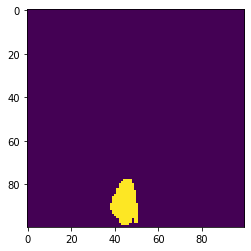

In [8]:

new_image = img3[stats[max_label][1]:stats[max_label][1]+stats[max_label][3],stats[max_label][0]:stats[max_label][0]+stats[max_label][2]]
image_for_input = cv2.resize(img3, (100, 100),  
               interpolation = cv2.INTER_NEAREST)
plt.imshow(image_for_input)